### Processamento de imagens

- Neste caderno jupyter vou replicar a atividade realizada na plataforma da Dio, sobre Publicação de pacotes no pypi e sobre processamento de imagens com a lib skimage.
- Plataforma da Dio: https://web.dio.me/play

In [46]:
#Author: Karina Tiemi Kato

#importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import gray2rgb
from skimage.exposure import match_histograms
from skimage.metrics import structural_similarity

#função para igualar os shapes(tamanhos) das imagens
def find_difference(image1, image2):
    assert image1.shape == image2.shape, "Specify 2 images with de same shape."
    gray_image1 = rgb2gray(image1)
    gray_image2 = rgb2gray(image2)
    (score, difference_image) = structural_similarity(gray_image1, gray_image2, full=True)
    print("Similarity of the images:", score)
    normalized_difference_image = (difference_image-np.min(difference_image))/(np.max(difference_image)-np.min(difference_image))
    return normalized_difference_image


def transfer_histogram(image1, image2):
    matched_image = match_histograms(image1, image2, multichannel=True)
    return matched_image

In [47]:
#Author: Karina Tiemi Kato
from skimage.transform import resize

def resize_image(image, proportion):
    assert 0 <= proportion <=1, "Specify a valid proportion between 0 and 1."
    height = round(image.shape[0]*proportion)
    width = round(image.shape[1]*proportion)
    image_resized = resize(image, (height, width), anti_aliasing=True)
    return image_resized

In [48]:
#Author: Karina Tiemi Kato
from skimage.io import imread, imsave

def read_image(path, is_gray = False):
    image = imread(path, as_gray = is_gray)
    return image

def save_image(image, path):
    imsave(path, image)

In [65]:
#Author: Karina Tiemi Kato
import matplotlib.pyplot as plt

def plot_image(image):
    plt.figure(figsize=(12, 4))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

def plot_result(*args):
    number_images = len(args)
    fig, axis = plt.subplots(nrows=1, ncols = number_images, figsize=(12,4))
    names_lst = ['image {}'.format(i) for i in range(1, number_images)]
    names_lst.append('Result')
    for ax, name, image in zip(axis, names_lst, args):
        ax.set_title(name)
        ax.imshow(image, cmap='gray')
        ax.axis('off')
    fig.tight_layout()
    plt.show()

def plot_histogram(image):
    fig, axis = plt.subplots(nrows=1, ncols = 3, figsize=(12,4), sharex=True, sharey=True)
    color_lst = ['red', 'green', 'blue']
    for index, (ax, color) in enumerate(zip(axis, color_lst)):
        ax.set_title('{} histogram'.format(color.title()))
        ax.hist(image[:,:, index].ravel(), bins = 256, color = color, alpha = 0.8)
    fig.tight_layout()
    plt.show()

In [66]:
Image1 = read_image("img1.jpg")
Image2 = read_image("img2.jpg")

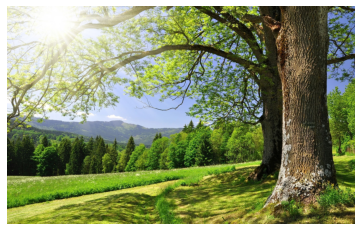

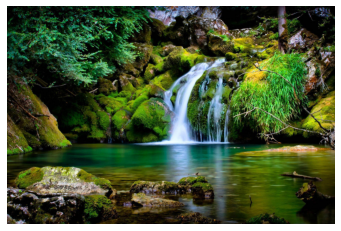

In [67]:
plot_image(Image1)
plot_image(Image2)

C:\Users\gilma\AppData\Local\Temp\ipykernel_17152\1689285852.py:18: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched_image = match_histograms(image1, image2, multichannel=True)


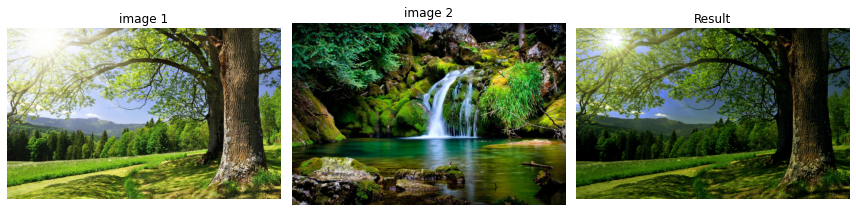

In [68]:
result_image = transfer_histogram(Image1, Image2)
plot_result(Image1, Image2, result_image)